In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [62]:
data = pd.read_csv("/content/Telco_Customer_Churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [65]:
for i in data.select_dtypes(include = 'object').columns:
    print(i)
    print(data[i].value_counts(normalize = True) * 100)
    print("*"*35)

customerID
customerID
7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64
***********************************
gender
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
***********************************
Partner
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
***********************************
Dependents
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
***********************************
PhoneService
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
***********************************
MultipleLines
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

In [66]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = "coerce")

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [69]:
data.dropna(inplace = True)

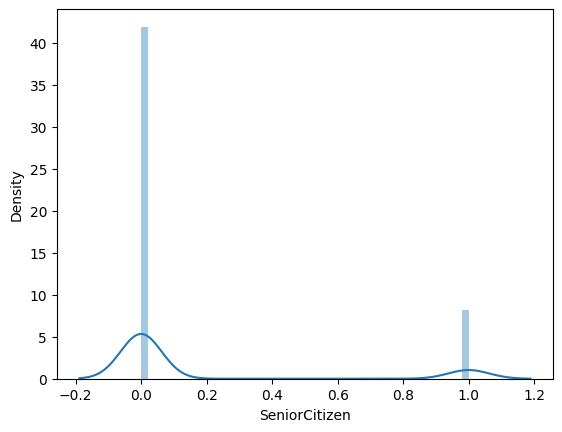

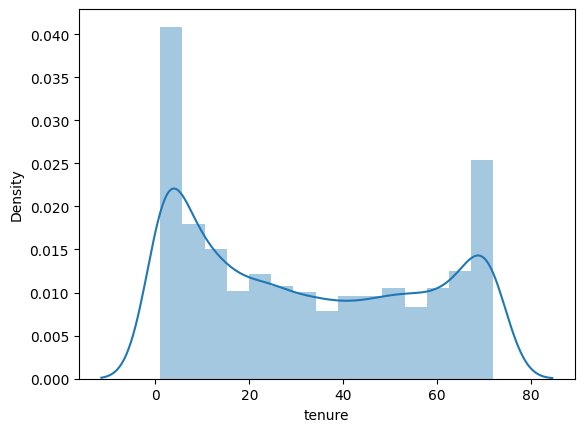

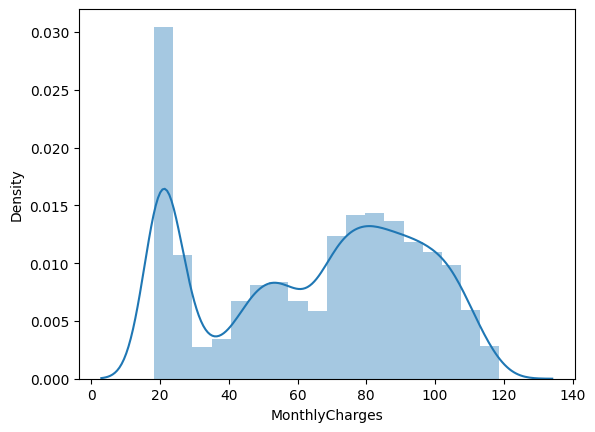

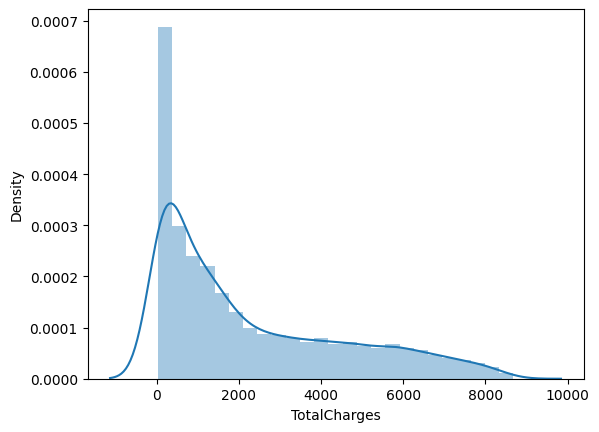

In [70]:
# univariant analysis

for col in data.select_dtypes(include="number").columns:
    plt.figure(figure=(6,6))
    sns.distplot(data[col])
    plt.show()
    print("\n")

In [71]:
num = data.select_dtypes(include="number").columns.tolist()
data[num].skew()


,0
SeniorCitizen,1.831103
tenure,0.237731
MonthlyCharges,-0.222103
TotalCharges,0.961642


In [73]:
data.drop("customerID", inplace=True, axis=1)

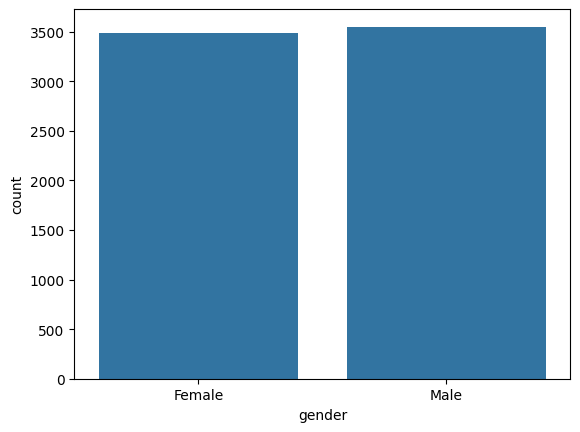

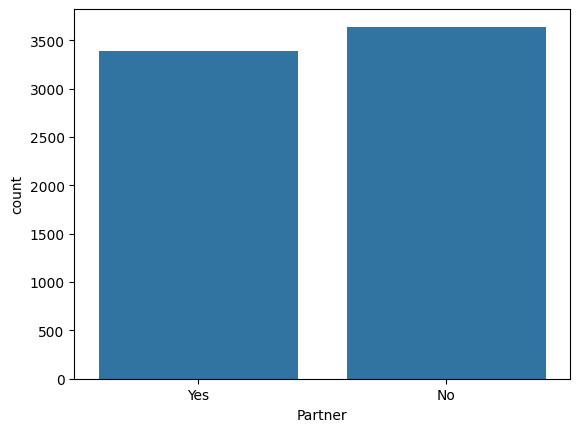

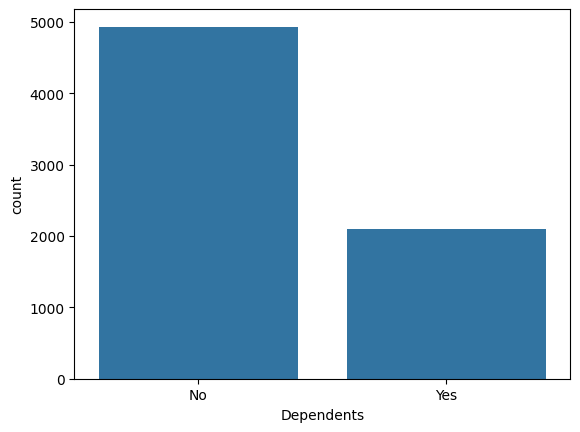

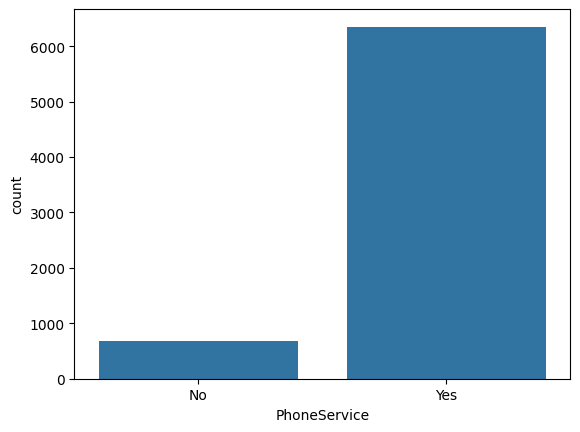

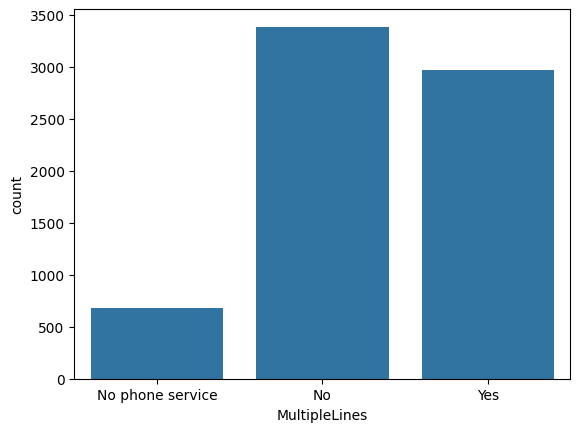

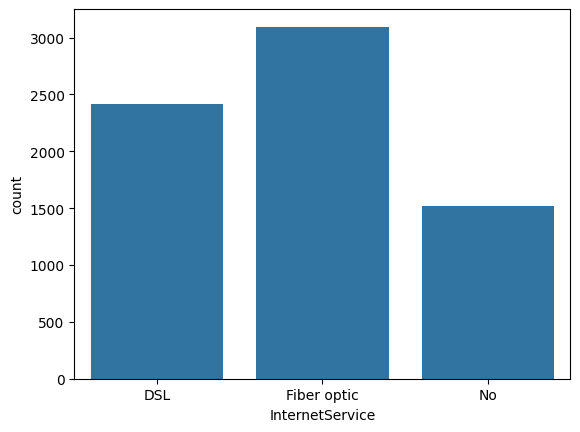

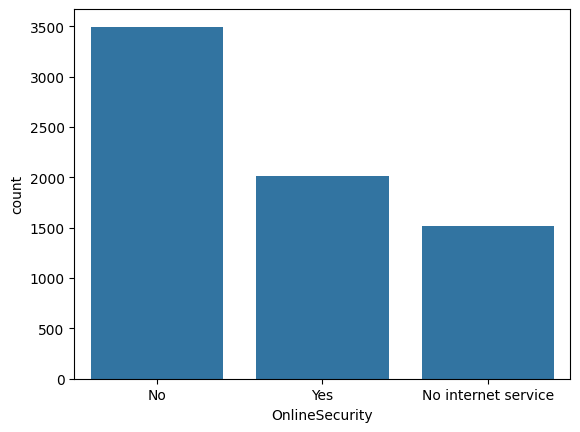

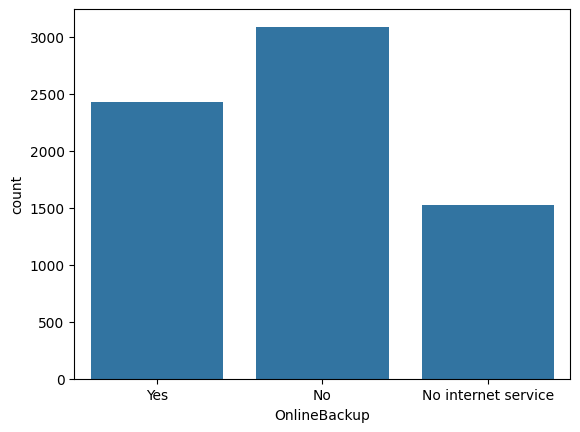

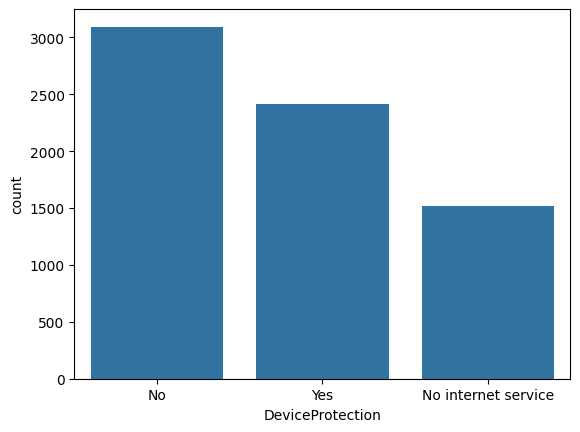

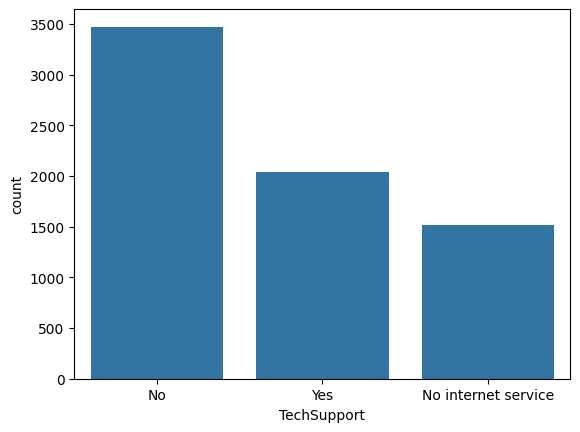

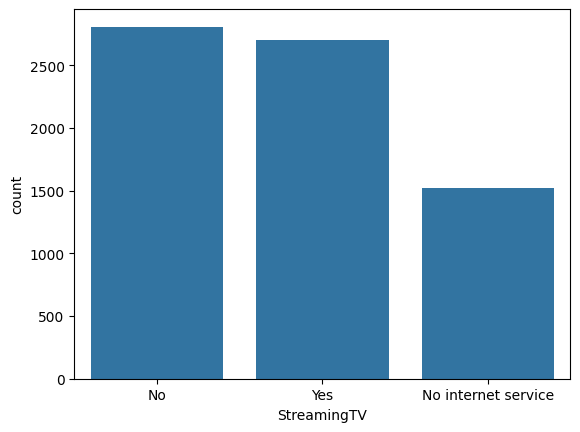

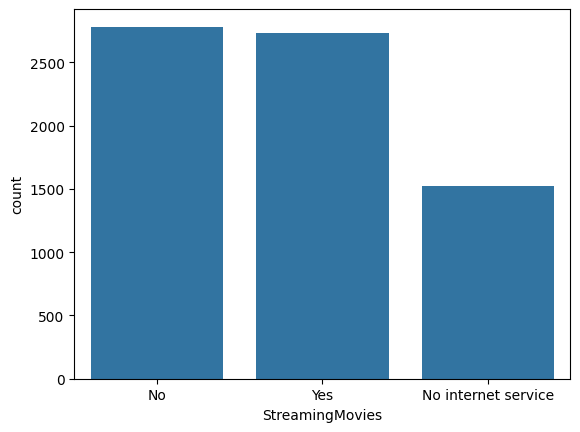

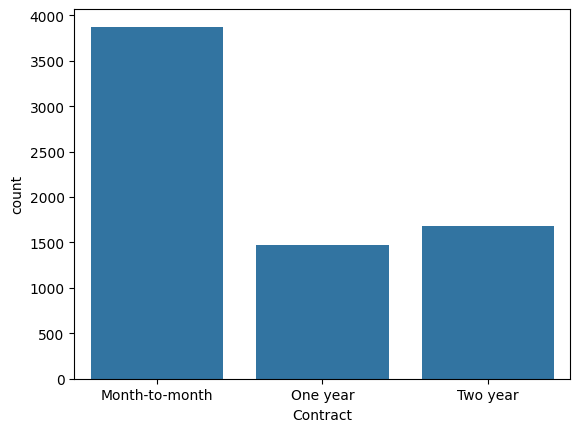

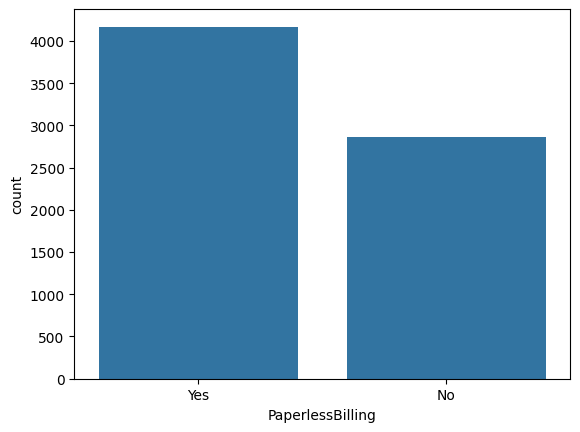

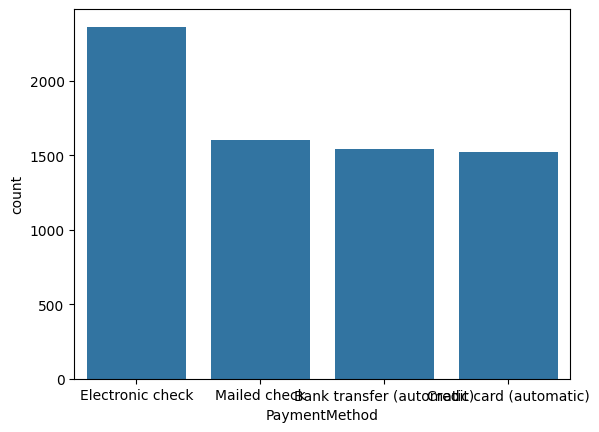

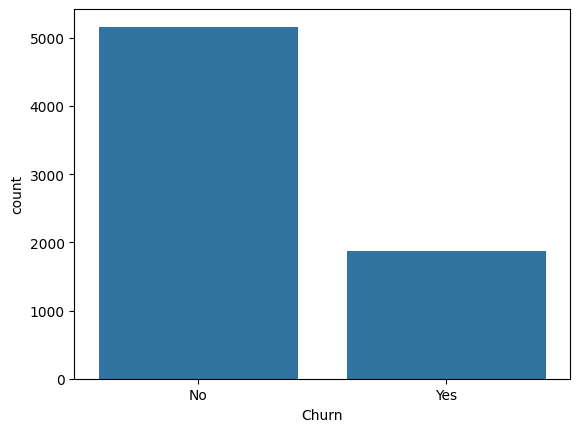

In [74]:
for col in data.select_dtypes(include="object").columns:
    plt.figure(figure=(6,6))
    sns.countplot(data=data, x=col)
    plt.show()
    print("\n")

In [75]:
data.select_dtypes(include="object").columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [76]:
data.select_dtypes(include="number").columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

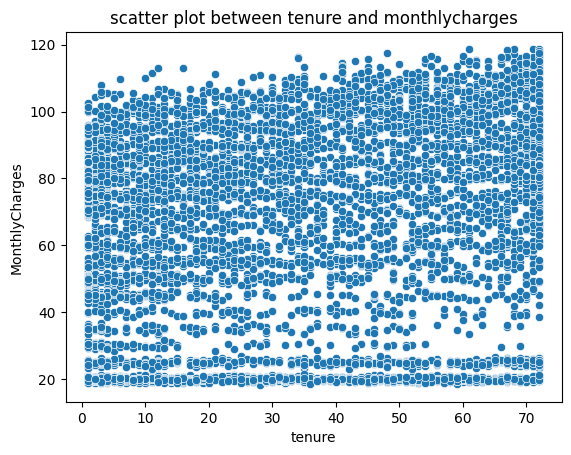

In [78]:
# Bivariant analysis
plt.figure(figure=(6,6))
plt.title("scatter plot between tenure and monthlycharges")
sns.scatterplot(data=data, x="tenure", y="MonthlyCharges")
plt.show()

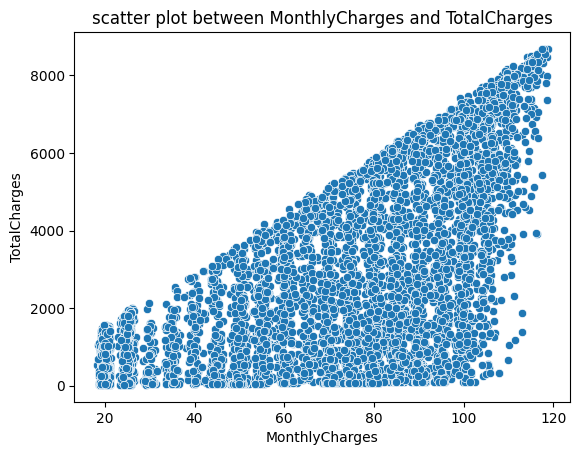

In [81]:
plt.figure(figure=(6,6))
plt.title("scatter plot between MonthlyCharges and TotalCharges")
sns.scatterplot(data=data, x="MonthlyCharges", y="TotalCharges")
plt.show()

In [85]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in data.select_dtypes(include="object").columns:
    if chi2_contingency(pd.crosstab(data['Churn'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[data.select_dtypes(include="object").columns.tolist(), chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


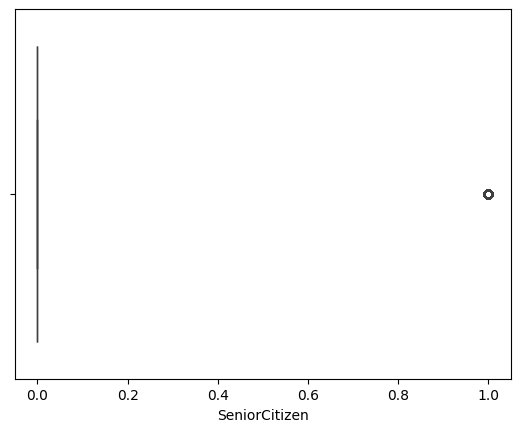

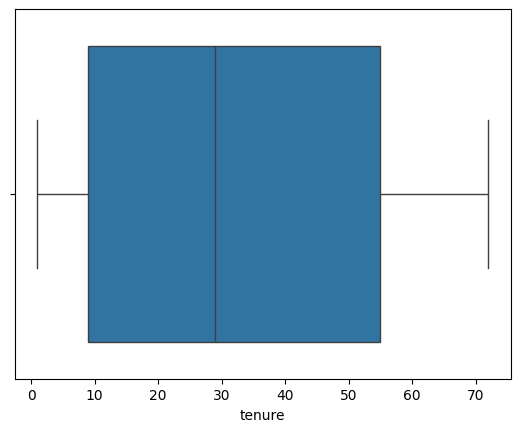

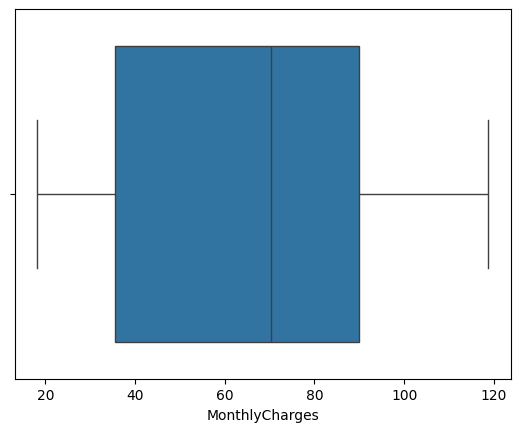

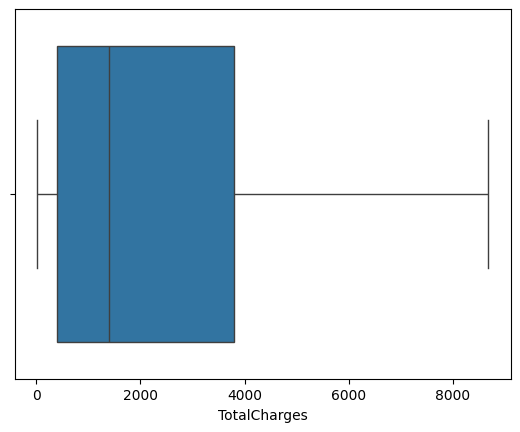

In [90]:
# Box plot

for col in data.select_dtypes(include="number").columns:
    plt.figure(figure=(6,6))
    sns.boxplot(data=data, x=col)
    plt.show()
    print("\n")

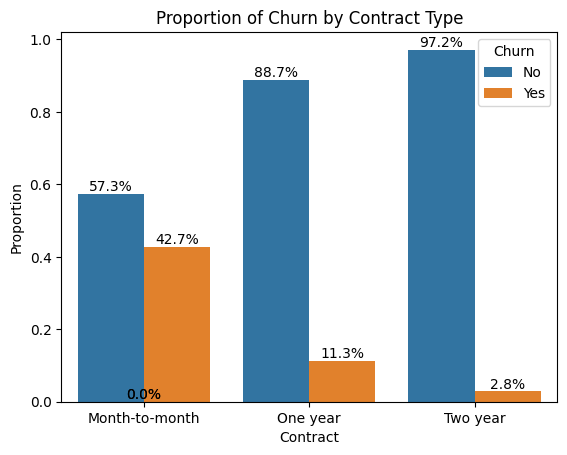

In [96]:
#Proportion of Churn by Contract Type

grouped_data = data.groupby(['Contract', 'Churn']).size().reset_index(name='counts')


grouped_data['proportion'] = grouped_data.groupby('Contract')['counts'].transform(lambda x: x / x.sum())

ax = sns.barplot(x='Contract', y='proportion', hue='Churn', data=grouped_data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.ylabel('Proportion')
plt.title('Proportion of Churn by Contract Type')
plt.show()

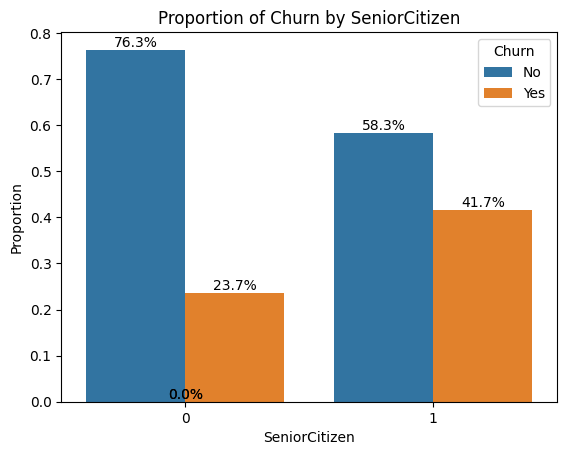

In [97]:
#Proportion of Churn by SeniorCitizen

grouped_data = data.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='counts')


grouped_data['proportion'] = grouped_data.groupby('SeniorCitizen')['counts'].transform(lambda x: x / x.sum())

ax = sns.barplot(x='SeniorCitizen', y='proportion', hue='Churn', data=grouped_data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.ylabel('Proportion')
plt.title('Proportion of Churn by SeniorCitizen')
plt.show()

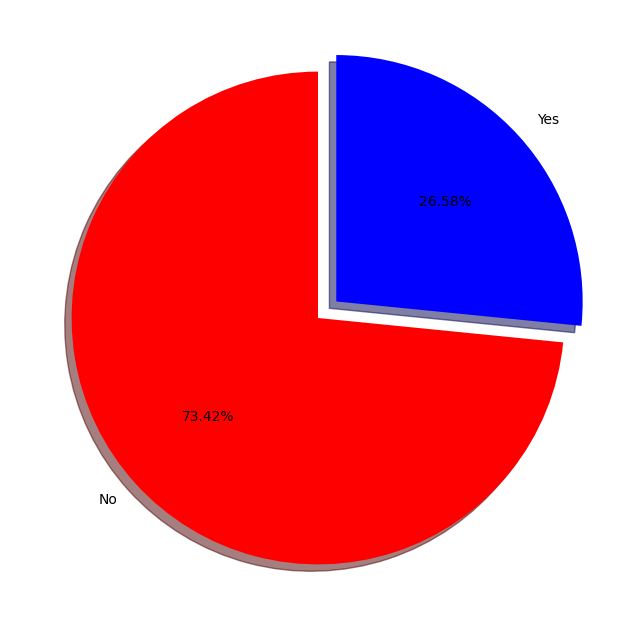

In [102]:
prest = data.Churn.value_counts() * 100
label = ["No", "Yes"]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

explode = (0, 0.1)
colors = ["red", "blue"]
ax.pie(prest, labels=label, startangle=90, autopct="%1.2f%%", explode=explode, shadow=True, colors=colors)

plt.show()

Text(0.5, 1.0, 'Churn by Monthly Charges')

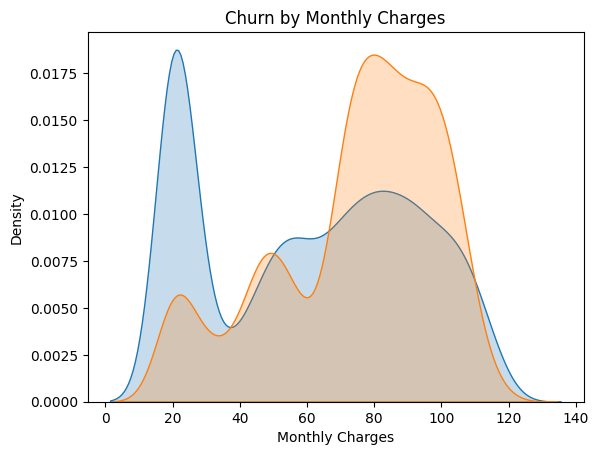

In [104]:
#churn by monthlycharges

sns.kdeplot(data.MonthlyCharges[(data['Churn'] == "No")], label="Not Churn", fill=True)
sns.kdeplot(data.MonthlyCharges[(data['Churn'] == "Yes")], label="Churn", fill=True)
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Churn by Monthly Charges")

Text(0.5, 1.0, 'Churn by Total Charges')

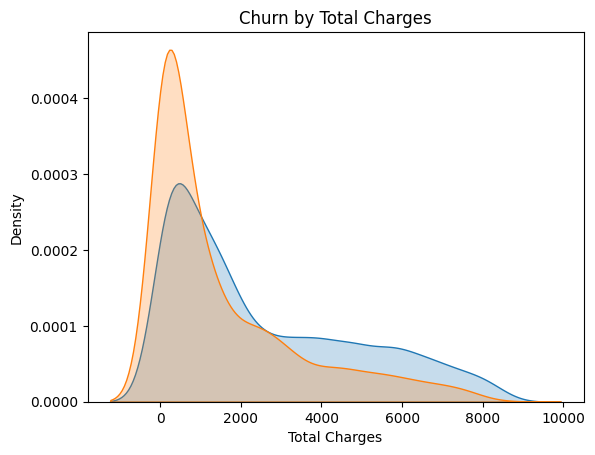

In [106]:
#churn by TotalCharges
sns.kdeplot(data.TotalCharges[(data['Churn'] == "No")], label="Not Churn", fill=True)
sns.kdeplot(data.TotalCharges[(data['Churn'] == "Yes")], label="Churn", fill=True)
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.title("Churn by Total Charges")

<Axes: >

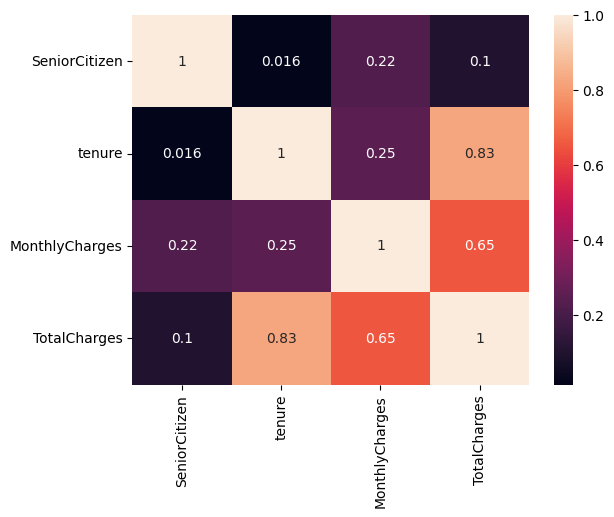

In [115]:
num = data.select_dtypes(include="number")
sns.heatmap(data= num.corr(),annot = True)